In [1]:
import pandas as pd

mr = pd.read_json("https://storage.googleapis.com/geospiza/query/mapleroyals-online-count.json")
ml = pd.read_json("https://storage.googleapis.com/geospiza/query/maplelegends-online-count.json")

In [5]:
mr

timestamp  onlineCount
0     2021-04-20 05:15:01.282000+00:00         1473
1     2021-04-20 05:00:00.962000+00:00         1516
2     2021-04-20 04:45:01.461000+00:00         1530
3     2021-04-20 04:30:00.965000+00:00         1568
4     2021-04-20 04:15:01.196000+00:00         1572
...                                ...          ...
10559 2020-12-23 07:30:01.578000+00:00         1987
10560 2020-12-23 07:15:01.079000+00:00         1964
10561 2020-12-23 07:00:01.385000+00:00         1978
10562 2020-12-23 06:45:01.177000+00:00         2027
10563 2020-12-23 06:42:01.096000+00:00         2018

[10564 rows x 2 columns]

In [6]:
ml

timestamp  usercount
0     2021-04-20 05:15:00.895000+00:00       1458
1     2021-04-20 05:00:01.288000+00:00       1513
2     2021-04-20 04:45:00.849000+00:00       1555
3     2021-04-20 04:30:00.581000+00:00       1568
4     2021-04-20 04:15:01.336000+00:00       1599
...                                ...        ...
29253 2020-06-10 07:29:37.453000+00:00       2584
29254 2020-06-10 07:29:04.642000+00:00       2583
29255 2020-06-10 07:26:54.690000+00:00       2574
29256 2020-06-10 07:26:35.179000+00:00       2574
29257 2020-06-10 07:16:52.276000+00:00       2540

[29258 rows x 2 columns]

<AxesSubplot:xlabel='timestamp'>

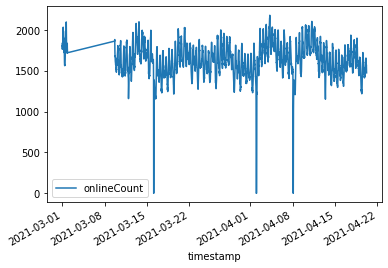

In [11]:
mr[mr.timestamp > "2021-03"].plot("timestamp", "onlineCount")

<AxesSubplot:xlabel='timestamp'>

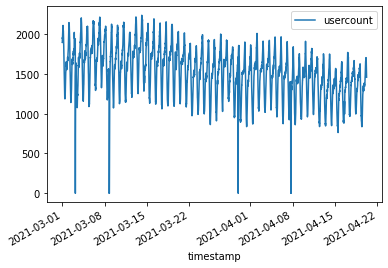

In [10]:
ml[ml.timestamp > "2021-03"].plot("timestamp", "usercount")

In [14]:
mr.timestamp = mr.timestamp.dt.round("15min")
ml.timestamp = ml.timestamp.dt.round("15min")

In [20]:
mr.dtypes, ml.dtypes

(timestamp      datetime64[ns, UTC]
 onlineCount                  int64
 dtype: object,
 timestamp    datetime64[ns, UTC]
 usercount                  int64
 dtype: object)

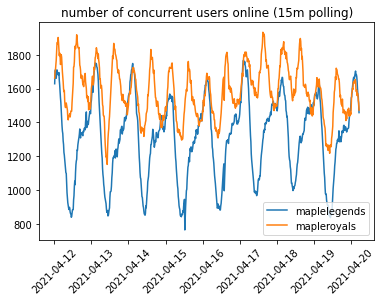

In [29]:
import matplotlib.pyplot as plt

ml_trunc = ml[ml.timestamp > "2021-04-12"]
mr_trunc = mr[mr.timestamp > "2021-04-12"]
plt.title("number of concurrent users online (15m polling)")
plt.plot(ml_trunc.timestamp, ml_trunc.usercount, label="maplelegends")
plt.plot(mr_trunc.timestamp, mr_trunc.onlineCount, label="mapleroyals")
plt.tick_params(axis='x', rotation=45)
plt.legend()
plt.show()